## Introduction: Heart Disease Prediction Using MLPClassifier
### Heart disease is a major health concern, and early detection can save lives. This project applies a Multi-layer Perceptron Classifier (MLPClassifier) to predict heart disease using patient data. Through hyperparameter tuning with GridSearchCV, we optimized the model for high accuracy and reliability. Evaluating F1-score, AUC, and precision-recall, we demonstrate the potential of neural networks in medical diagnosis.

### Import the data

In [30]:
import pandas as pd 
import os
# Define the correct folder path
base_path = "Data/Heart"

# Construct the full path to the CSV file
csv_file = os.path.join(base_path, "heart.csv")

# Load the dataset
data = pd.read_csv(csv_file)

# Print the first few rows to confirm it's loading correctly
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


### Start with exploratory analysis

target
0    499
1    526
dtype: int64


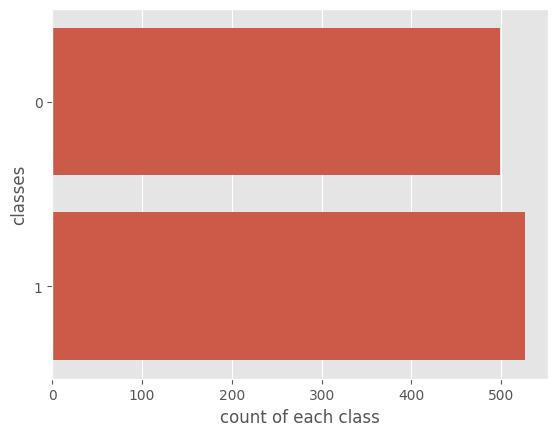

In [31]:
print(data.groupby('target').size())

#some imports to plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=data.target ,data=data)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [32]:
data.info(verbose=True)
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Set your X and y so then you can divide the data into train and test

In [33]:
X = data.drop(columns="target")
y = data["target"].values
column_names = list(X)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=43,stratify= y)

### Create the model and apply it to your train set, and generate predictions with your test

In [35]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(7,7,7), activation="relu",alpha=0.001,batch_size="auto",learning_rate="constant",max_iter=200,solver="adam",tol=0.01,verbose=True)

model.fit(X_train, y_train)
model.predict(X_test)

Iteration 1, loss = 17.23202595
Iteration 2, loss = 16.11765598
Iteration 3, loss = 13.64127152
Iteration 4, loss = 11.18774089
Iteration 5, loss = 9.57945483
Iteration 6, loss = 8.42251354
Iteration 7, loss = 7.37458751
Iteration 8, loss = 6.39459280
Iteration 9, loss = 5.45492029
Iteration 10, loss = 4.54631460
Iteration 11, loss = 3.63206600
Iteration 12, loss = 2.74377204
Iteration 13, loss = 1.89988300
Iteration 14, loss = 1.17315805
Iteration 15, loss = 0.92407412
Iteration 16, loss = 1.02021928
Iteration 17, loss = 1.11901961
Iteration 18, loss = 1.07335921
Iteration 19, loss = 0.96388317
Iteration 20, loss = 0.90693522
Iteration 21, loss = 0.90298300
Iteration 22, loss = 0.91588848
Iteration 23, loss = 0.91134082
Iteration 24, loss = 0.89593520
Iteration 25, loss = 0.88731826
Iteration 26, loss = 0.88825863
Iteration 27, loss = 0.88851836
Iteration 28, loss = 0.88542685
Iteration 29, loss = 0.88158442
Iteration 30, loss = 0.88011937
Iteration 31, loss = 0.87844152
Training loss

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

### Use grid search to find the best parameters

In [36]:
classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(6,6,6),(8,6,4),(8,8)],"max_iter":[50000], "alpha":[0.01,0.001,1,10]}

In [37]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [38]:
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 2/12] START alpha=0.01, hidden_layer_sizes=(8, 6, 4), max_iter=50000...
[CV 3/3; 2/12] START alpha=0.01, hidden_layer_sizes=(8, 6, 4), max_iter=50000...
[CV 1/3; 3/12] START alpha=0.01, hidden_layer_sizes=(8, 8), max_iter=50000......
[CV 3/3; 1/12] START alpha=0.01, hidden_layer_sizes=(6, 6, 6), max_iter=50000...
[CV 1/3; 1/12] START alpha=0.01, hidden_layer_sizes=(6, 6, 6), max_iter=50000...
[CV 2/3; 3/12] START alpha=0.01, hidden_layer_sizes=(8, 8), max_iter=50000......
[CV 2/3; 1/12] START alpha=0.01, hidden_layer_sizes=(6, 6, 6), max_iter=50000...
[CV 2/3; 2/12] START alpha=0.01, hidden_layer_sizes=(8, 6, 4), max_iter=50000...
[CV 1/3; 3/12] END alpha=0.01, hidden_layer_sizes=(8, 8), max_iter=50000;, score=0.765 total time=   0.9s
[CV 2/3; 3/12] END alpha=0.01, hidden_layer_sizes=(8, 8), max_iter=50000;, score=0.830 total time=   1.0s
[CV 3/3; 3/12] START alpha=0.01, hidden_layer_sizes=(8, 8), max_iter=50000.....

In [39]:
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.837093 using {'alpha': 0.01, 'hidden_layer_sizes': (6, 6, 6), 'max_iter': 50000}
0.837093 (0.009278) with: {'alpha': 0.01, 'hidden_layer_sizes': (6, 6, 6), 'max_iter': 50000}
0.817935 (0.017886) with: {'alpha': 0.01, 'hidden_layer_sizes': (8, 6, 4), 'max_iter': 50000}
0.792798 (0.027050) with: {'alpha': 0.01, 'hidden_layer_sizes': (8, 8), 'max_iter': 50000}
0.774055 (0.078176) with: {'alpha': 0.001, 'hidden_layer_sizes': (6, 6, 6), 'max_iter': 50000}
0.824340 (0.019813) with: {'alpha': 0.001, 'hidden_layer_sizes': (8, 6, 4), 'max_iter': 50000}
0.818230 (0.022101) with: {'alpha': 0.001, 'hidden_layer_sizes': (8, 8), 'max_iter': 50000}
0.773545 (0.072727) with: {'alpha': 1, 'hidden_layer_sizes': (6, 6, 6), 'max_iter': 50000}
0.826838 (0.026117) with: {'alpha': 1, 'hidden_layer_sizes': (8, 6, 4), 'max_iter': 50000}
0.799218 (0.032567) with: {'alpha': 1, 'hidden_layer_sizes': (8, 8), 'max_iter': 50000}
0.719165 (0.014562) with: {'alpha': 10, 'hidden_l

### Test the model on your test set

In [40]:
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,

### Evaluation

In [41]:

from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.8611111111111112
--
***RESULTS ON TEST SET***
f1_score:  0.8555240793201133


### Additional interesting metrics 

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       150
           1       0.77      0.96      0.86       158

    accuracy                           0.83       308
   macro avg       0.86      0.83      0.83       308
weighted avg       0.85      0.83      0.83       308

[[106  44]
 [  7 151]]


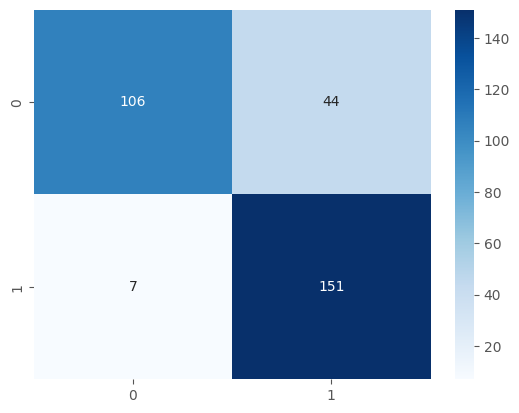

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); 

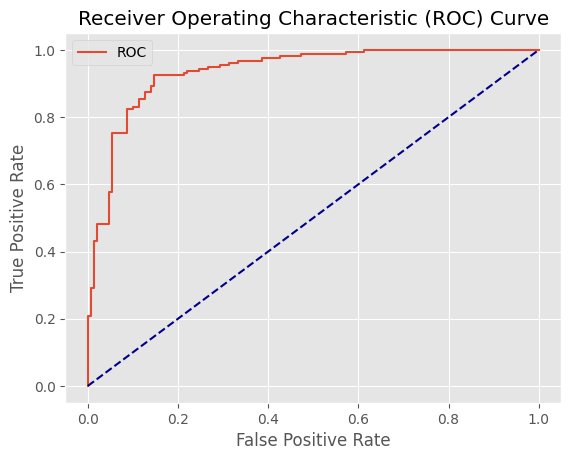

AUC: 0.94


In [44]:
from sklearn import metrics

model=MLPClassifier(hidden_layer_sizes=(6,6,6), alpha=0.1, max_iter=50000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_probs = model.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### The MLPClassifier successfully predicted heart disease with strong performance (AUC = 0.94, F1 = 0.855), showing its effectiveness for medical diagnosis tasks. With further tuning and feature refinement, this model could be a valuable tool for risk prediction in healthcare.